In [1]:
import numpy as np
import pandas as pd

In [2]:
pitching3_df = pd.read_csv("db/pitching3.csv")

Summarize the pitching data into player data

In [3]:
pitching3_df = pitching3_df.groupby(["playerID"],as_index=False).sum()
pitching3_df.head(10)

,playerID,seas #,Tot yrs,yearID,W,L,G,GS,IPouts,H,ER,BB,SO,ERA,year WS,careerWS,decade,lastyear,numyears,wsPerYr
0,adamsba01,28,49,13408,122,75,251,221,5464,1602,459,249,700,16.01,164,1701,13440,13482,133,89.526316
1,aldrivi01,28,49,13475,91,73,215,199,4445,1560,629,469,472,27.28,97,714,13440,13496,63,79.333333
2,alexado01,28,49,13876,100,63,221,215,4641,1488,585,405,745,33.87,112,1344,13860,13923,133,70.736842
3,alexape01,28,49,13419,192,80,320,274,7374,2081,549,481,1215,14.39,252,3332,13440,13510,140,166.600000
4,allenjo02,28,49,13551,103,44,203,163,3895,1188,524,507,767,25.32,109,1015,13580,13608,91,78.076923
5,antonjo02,28,49,13692,114,89,270,235,4991,1498,571,552,993,21.82,133,1022,13720,13727,84,85.166667
6,appieke01,28,49,13965,95,70,228,225,4529,1306,547,503,1254,22.92,129,1316,14000,14028,112,82.250000
7,aukerel01,28,49,13562,104,73,253,199,4624,1716,710,535,474,29.33,106,840,13580,13594,70,84.000000
8,bagbyji01,28,49,13433,122,85,290,201,5207,1772,583,424,424,23.97,136,973,13440,13461,63,108.111111
9,barneje01,28,49,13446,114,97,290,222,5561,1873,606,332,472,26.57,127,1092,13440,13489,91,84.000000


In [4]:
pitching3_df.columns

Index(['playerID', 'seas #', 'Tot yrs', 'yearID', 'W', 'L', 'G', 'GS',
       'IPouts', 'H', 'ER', 'BB', 'SO', 'ERA', 'year WS', 'careerWS', 'decade',
       'lastyear', 'numyears', 'wsPerYr'],
      dtype='object')

In [5]:
# no longer needed, and their sums would not make sense any way
del pitching3_df["yearID"]
del pitching3_df["careerWS"]
del pitching3_df["year WS"]
del pitching3_df["decade"]
del pitching3_df["lastyear"]
del pitching3_df["numyears"]
del pitching3_df["wsPerYr"]
pitching3_df.head()

,playerID,seas #,Tot yrs,W,L,G,GS,IPouts,H,ER,BB,SO,ERA
0,adamsba01,28,49,122,75,251,221,5464,1602,459,249,700,16.01
1,aldrivi01,28,49,91,73,215,199,4445,1560,629,469,472,27.28
2,alexado01,28,49,100,63,221,215,4641,1488,585,405,745,33.87
3,alexape01,28,49,192,80,320,274,7374,2081,549,481,1215,14.39
4,allenjo02,28,49,103,44,203,163,3895,1188,524,507,767,25.32


In [6]:
# computed fields must be re-computed - their sums wouldn't make any sense
pitching3_df["ERA"]  = 9 * pitching3_df["ER"]/(pitching3_df["IPouts"]/3)
# I'd like to see what effect WHIP has, although I suspect it will be found to be highly correlated
pitching3_df["WHIP"] = (pitching3_df["H"]+pitching3_df["BB"])/(pitching3_df["IPouts"]/3)
pitching3_df["PCT"]  = pitching3_df["W"]/(pitching3_df["W"]+pitching3_df["L"])


In [7]:
pitching3_df.head(10)

,playerID,seas #,Tot yrs,W,L,G,GS,IPouts,H,ER,BB,SO,ERA,WHIP,PCT
0,adamsba01,28,49,122,75,251,221,5464,1602,459,249,700,2.268119,1.016288,0.619289
1,aldrivi01,28,49,91,73,215,199,4445,1560,629,469,472,3.820697,1.369404,0.554878
2,alexado01,28,49,100,63,221,215,4641,1488,585,405,745,3.403361,1.223659,0.613497
3,alexape01,28,49,192,80,320,274,7374,2081,549,481,1215,2.010171,1.042311,0.705882
4,allenjo02,28,49,103,44,203,163,3895,1188,524,507,767,3.632349,1.305520,0.700680
5,antonjo02,28,49,114,89,270,235,4991,1498,571,552,993,3.088960,1.232218,0.561576
6,appieke01,28,49,95,70,228,225,4529,1306,547,503,1254,3.260985,1.198278,0.575758
7,aukerel01,28,49,104,73,253,199,4624,1716,710,535,474,4.145761,1.460424,0.587571
8,bagbyji01,28,49,122,85,290,201,5207,1772,583,424,424,3.023046,1.265220,0.589372
9,barneje01,28,49,114,97,290,222,5561,1873,606,332,472,2.942277,1.189534,0.540284


At this point, introduce data to identify players as being in the Hall Of Fame or not

In [8]:
HOF_df = pd.read_csv("db/HallOfFame.csv")
HOF_df.head()


,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [9]:
# unsuccessful votes are irrelevant for our purposes
HOF_subset1_df = HOF_df.loc[HOF_df["inducted"] == "Y", :]

# consider only those elected as players.  Some players were elected as managers.
HOF_subset2_df = HOF_subset1_df.loc[HOF_subset1_df["category"] == "Player", :]

# exclude any players elected from the Negro Leagues.  These are not likely to have relevant MLB statistics
HOF_subset3_df = HOF_subset2_df.loc[HOF_subset2_df["votedBy"] != "Negro League", :]


# discard unneeded columns
xyz = ["playerID","inducted"]
HOF_df = HOF_subset3_df[xyz]
HOF_df.head()


,playerID,inducted
0,cobbty01,Y
1,ruthba01,Y
2,wagneho01,Y
3,mathech01,Y
4,johnswa01,Y


In [10]:
pitching3_df = pd.merge(pitching3_df, HOF_df, on="playerID", how="left")


In [11]:
pitching3_df.head(30)

,playerID,seas #,Tot yrs,W,L,G,GS,IPouts,H,ER,BB,SO,ERA,WHIP,PCT,inducted
0,adamsba01,28,49,122,75,251,221,5464,1602,459,249,700,2.268119,1.016288,0.619289,NaN
1,aldrivi01,28,49,91,73,215,199,4445,1560,629,469,472,3.820697,1.369404,0.554878,NaN
2,alexado01,28,49,100,63,221,215,4641,1488,585,405,745,3.403361,1.223659,0.613497,NaN
3,alexape01,28,49,192,80,320,274,7374,2081,549,481,1215,2.010171,1.042311,0.705882,Y
4,allenjo02,28,49,103,44,203,163,3895,1188,524,507,767,3.632349,1.305520,0.700680,NaN
5,antonjo02,28,49,114,89,270,235,4991,1498,571,552,993,3.088960,1.232218,0.561576,NaN
6,appieke01,28,49,95,70,228,225,4529,1306,547,503,1254,3.260985,1.198278,0.575758,NaN
7,aukerel01,28,49,104,73,253,199,4624,1716,710,535,474,4.145761,1.460424,0.587571,NaN
8,bagbyji01,28,49,122,85,290,201,5207,1772,583,424,424,3.023046,1.265220,0.589372,NaN
9,barneje01,28,49,114,97,290,222,5561,1873,606,332,472,2.942277,1.189534,0.540284,NaN


We will need to convert the "inducted" to 1s and 0s

In [12]:
HOF_member = []
for index, player in pitching3_df.iterrows():
    if player["inducted"] == "Y":
        HOF_member.append(1)
    else:
        HOF_member.append(0)

pitching3_df["HOF_member"] = HOF_member
pitching3_df.head(10)

,playerID,seas #,Tot yrs,W,L,G,GS,IPouts,H,ER,BB,SO,ERA,WHIP,PCT,inducted,HOF_member
0,adamsba01,28,49,122,75,251,221,5464,1602,459,249,700,2.268119,1.016288,0.619289,NaN,0
1,aldrivi01,28,49,91,73,215,199,4445,1560,629,469,472,3.820697,1.369404,0.554878,NaN,0
2,alexado01,28,49,100,63,221,215,4641,1488,585,405,745,3.403361,1.223659,0.613497,NaN,0
3,alexape01,28,49,192,80,320,274,7374,2081,549,481,1215,2.010171,1.042311,0.705882,Y,1
4,allenjo02,28,49,103,44,203,163,3895,1188,524,507,767,3.632349,1.305520,0.700680,NaN,0
5,antonjo02,28,49,114,89,270,235,4991,1498,571,552,993,3.088960,1.232218,0.561576,NaN,0
6,appieke01,28,49,95,70,228,225,4529,1306,547,503,1254,3.260985,1.198278,0.575758,NaN,0
7,aukerel01,28,49,104,73,253,199,4624,1716,710,535,474,4.145761,1.460424,0.587571,NaN,0
8,bagbyji01,28,49,122,85,290,201,5207,1772,583,424,424,3.023046,1.265220,0.589372,NaN,0
9,barneje01,28,49,114,97,290,222,5561,1873,606,332,472,2.942277,1.189534,0.540284,NaN,0


In [13]:
pitching3_df.columns

Index(['playerID', 'seas #', 'Tot yrs', 'W', 'L', 'G', 'GS', 'IPouts', 'H',
       'ER', 'BB', 'SO', 'ERA', 'WHIP', 'PCT', 'inducted', 'HOF_member'],
      dtype='object')

Columns with high correlation should not both be used.

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
# create a work dataframe that will make seeing correlations a little easier
#work_df = pitching3_df[[ "W", "SO", "PCT", "ERA", "G","WHIP", "pts_W", "pts_K", "pts_PCT", "pts_ERA"]]
work_df = pitching3_df[[ "W", "SO", "PCT", "ERA", "G","WHIP"]]


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


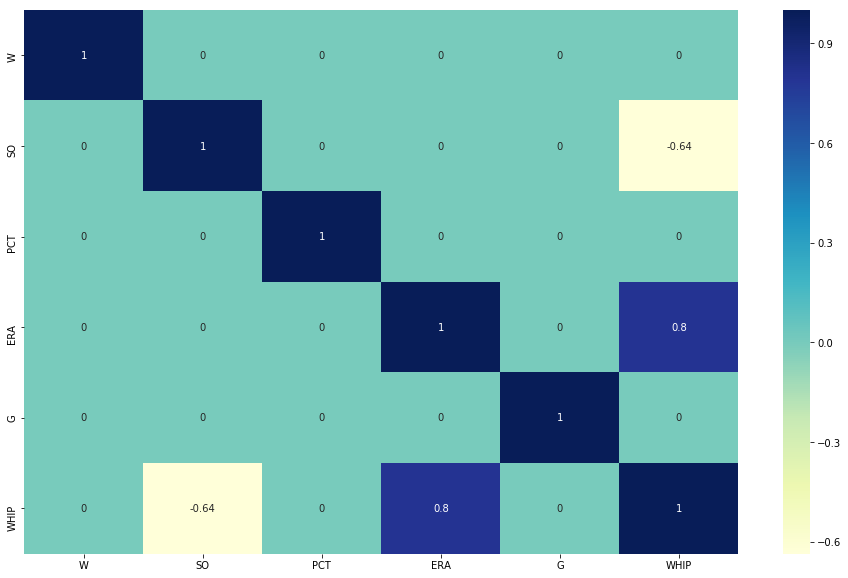

In [17]:
corr_matrix = work_df.corr()
corr_matrix[np.abs(corr_matrix) < .6] = 0      # masking lower correlations helps higher ones to stand out

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

Unsurprisingly, all representations of seasonal accomplishments (pts_x) have a high correlation with their corresponding career fields, just as they did with batting statistics.  So they can be discarded.

That leaves us with six stats:  Games, Wins, Strikeouts, Winning Percent, Earned Run Average, and Walks/Hits per Inning Pitched. We are finding WHIP with a high correlation to Strikeouts and ERA, so it can be eliminated.  Wins has a high correlation to Pct and Games; I'd say proceed with caution on these.

-----
With that, we can cut down again on the number of columns we need to keep.  With a change this big, we'll move to the next generation (batting4),


In [18]:
xyz = ["playerID","G", "W", "SO","PCT", "ERA", "WHIP", "HOF_member"]
pitching4_df = pitching3_df[xyz]
pitching4_df.head()

,playerID,G,W,SO,PCT,ERA,WHIP,HOF_member
0,adamsba01,251,122,700,0.62,2.27,1.02,0
1,aldrivi01,215,91,472,0.55,3.82,1.37,0
2,alexado01,221,100,745,0.61,3.40,1.22,0
3,alexape01,320,192,1215,0.71,2.01,1.04,1
4,allenjo02,203,103,767,0.70,3.63,1.31,0


"lastyear" was polluted by being summed, but we still need it for one more thing.  Merge it back in from when it was last good, that being in pitching2.

In [19]:
pitching2_df = pd.read_csv("db/pitching2.csv")
pitching2_df = pitching2_df[["playerID","lastyear"]]
pitching2_df.drop_duplicates(inplace=True)
pitching2_df.head(10)

,playerID,lastyear
0,adamsba01,1926
19,aldrivi01,1928
28,alexado01,1989
47,alexape01,1930
67,allenjo02,1944
80,antonjo02,1961
92,appieke01,2004
108,aukerel01,1942
118,bagbyji01,1923
127,barneje01,1927


In [20]:
pitching4_df = pd.merge(pitching4_df, pitching2_df, on="playerID", how="left")
pitching4_df.head(20)

,playerID,G,W,SO,PCT,ERA,WHIP,HOF_member,lastyear
0,adamsba01,251,122,700,0.62,2.27,1.02,0,1926
1,aldrivi01,215,91,472,0.55,3.82,1.37,0,1928
2,alexado01,221,100,745,0.61,3.40,1.22,0,1989
3,alexape01,320,192,1215,0.71,2.01,1.04,1,1930
4,allenjo02,203,103,767,0.70,3.63,1.31,0,1944
5,antonjo02,270,114,993,0.56,3.09,1.23,0,1961
6,appieke01,228,95,1254,0.58,3.26,1.20,0,2004
7,aukerel01,253,104,474,0.59,4.15,1.46,0,1942
8,bagbyji01,290,122,424,0.59,3.02,1.27,0,1923
9,barneje01,290,114,472,0.54,2.94,1.19,0,1927


------
Next will be to split off more recent players.  These are still active and recent retirees, and can be used to make and test predictions.

In [21]:
pitching_recent_df = pitching4_df.loc[pitching4_df["lastyear"] > 2010, :]
pitching4_df       = pitching4_df.loc[pitching4_df["lastyear"] < 2011, :]

At this point, the data is ready to be processed into a logistic regression.  Drop lastyear.  Write out files without headers.

In [22]:
del pitching_recent_df["lastyear"]
pitching_recent_df.head()

,playerID,G,W,SO,PCT,ERA,WHIP,HOF_member
21,buehrma01,231,105,934,0.60,3.59,1.23,0
22,bumgama01,216,99,1394,0.59,3.02,1.09,0
40,cuetojo01,216,100,1160,0.63,3.05,1.14,0
73,greinza01,224,114,1411,0.71,2.70,1.07,0
83,hallaro01,233,134,1357,0.71,2.82,1.09,0


In [23]:
del pitching4_df["lastyear"]
pitching4_df.head()

,playerID,G,W,SO,PCT,ERA,WHIP,HOF_member
0,adamsba01,251,122,700,0.62,2.27,1.02,0
1,aldrivi01,215,91,472,0.55,3.82,1.37,0
2,alexado01,221,100,745,0.61,3.40,1.22,0
3,alexape01,320,192,1215,0.71,2.01,1.04,1
4,allenjo02,203,103,767,0.70,3.63,1.31,0


In [24]:
pitching_recent_df.to_csv("db/pitching_recent.csv", index=False, header=True)

In [25]:
pitching4_df.to_csv("db/pitching4.csv", index=False, header=True)